# Diabetes Prediction usinf Logistic Regression (custom and from sklearn), Decision Tree and Random Forest
<br>

#### Data was imported from [Kaggle](https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset/code).

# Imports and Data Analysis

In [1]:
import pandas as pd
import numpy as np
import copy, math
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('Training.csv')
test_data = pd.read_csv('Testing.csv')

test_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      120             72             22       56  20.8   
1            1       71             62              0        0  21.8   
2            8       74             70             40       49  35.3   
3            5       88             78             30        0  27.6   
4           10      115             98              0        0  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.733   48        0  
1                     0.416   26        0  
2                     0.705   39        0  
3                     0.258   37        0  
4                     1.022   34        0

#### Data has been already splited into test and train.

In [3]:
train_data.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2460.000000  2460.000000    2460.000000    2460.000000  2460.000000   
mean      3.817480   121.602033      68.915041      20.531301    80.119919   
std       3.296458    31.789270      19.082655      15.716901   116.765807   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000   100.000000      64.000000       0.000000     0.000000   
50%       3.000000   117.000000      70.000000      23.000000    36.000000   
75%       6.000000   142.000000      80.000000      33.000000   129.000000   
max      17.000000   197.000000     122.000000      63.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2460.000000               2460.000000  2460.000000  2460.000000  
mean     31.990447                  0.491440    32.821951     0.390244  
std       7.802569                  0.363917    11.251208     0.487904  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.100000                  0.251750    24.000000     0.000000  
50%      32.100000                  0.381000    29.000000     0.000000  
75%      36.500000                  0.647000    39.000000     1.000000  
max      67.100000                  2.420000    81.000000     1.000000

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


#### We don't have any extremly incorrect data. No N/A

In [5]:
train_data.shape

(2460, 9)

In [6]:
test_data.shape

(308, 9)

<Axes: >

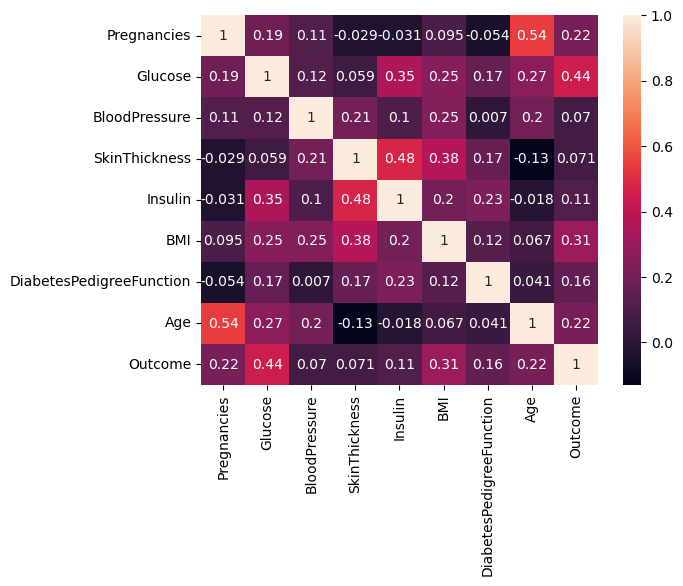

In [7]:
sns.heatmap(train_data.corr(), annot=True)

**We can see slight linear correlation between Age and number of Pregnancies (which is completely logicall). 
And also we can see sligh correlation between Insulin level and Skin Thickness as well as between Insulin and Glucose.**

/Users/irenzo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


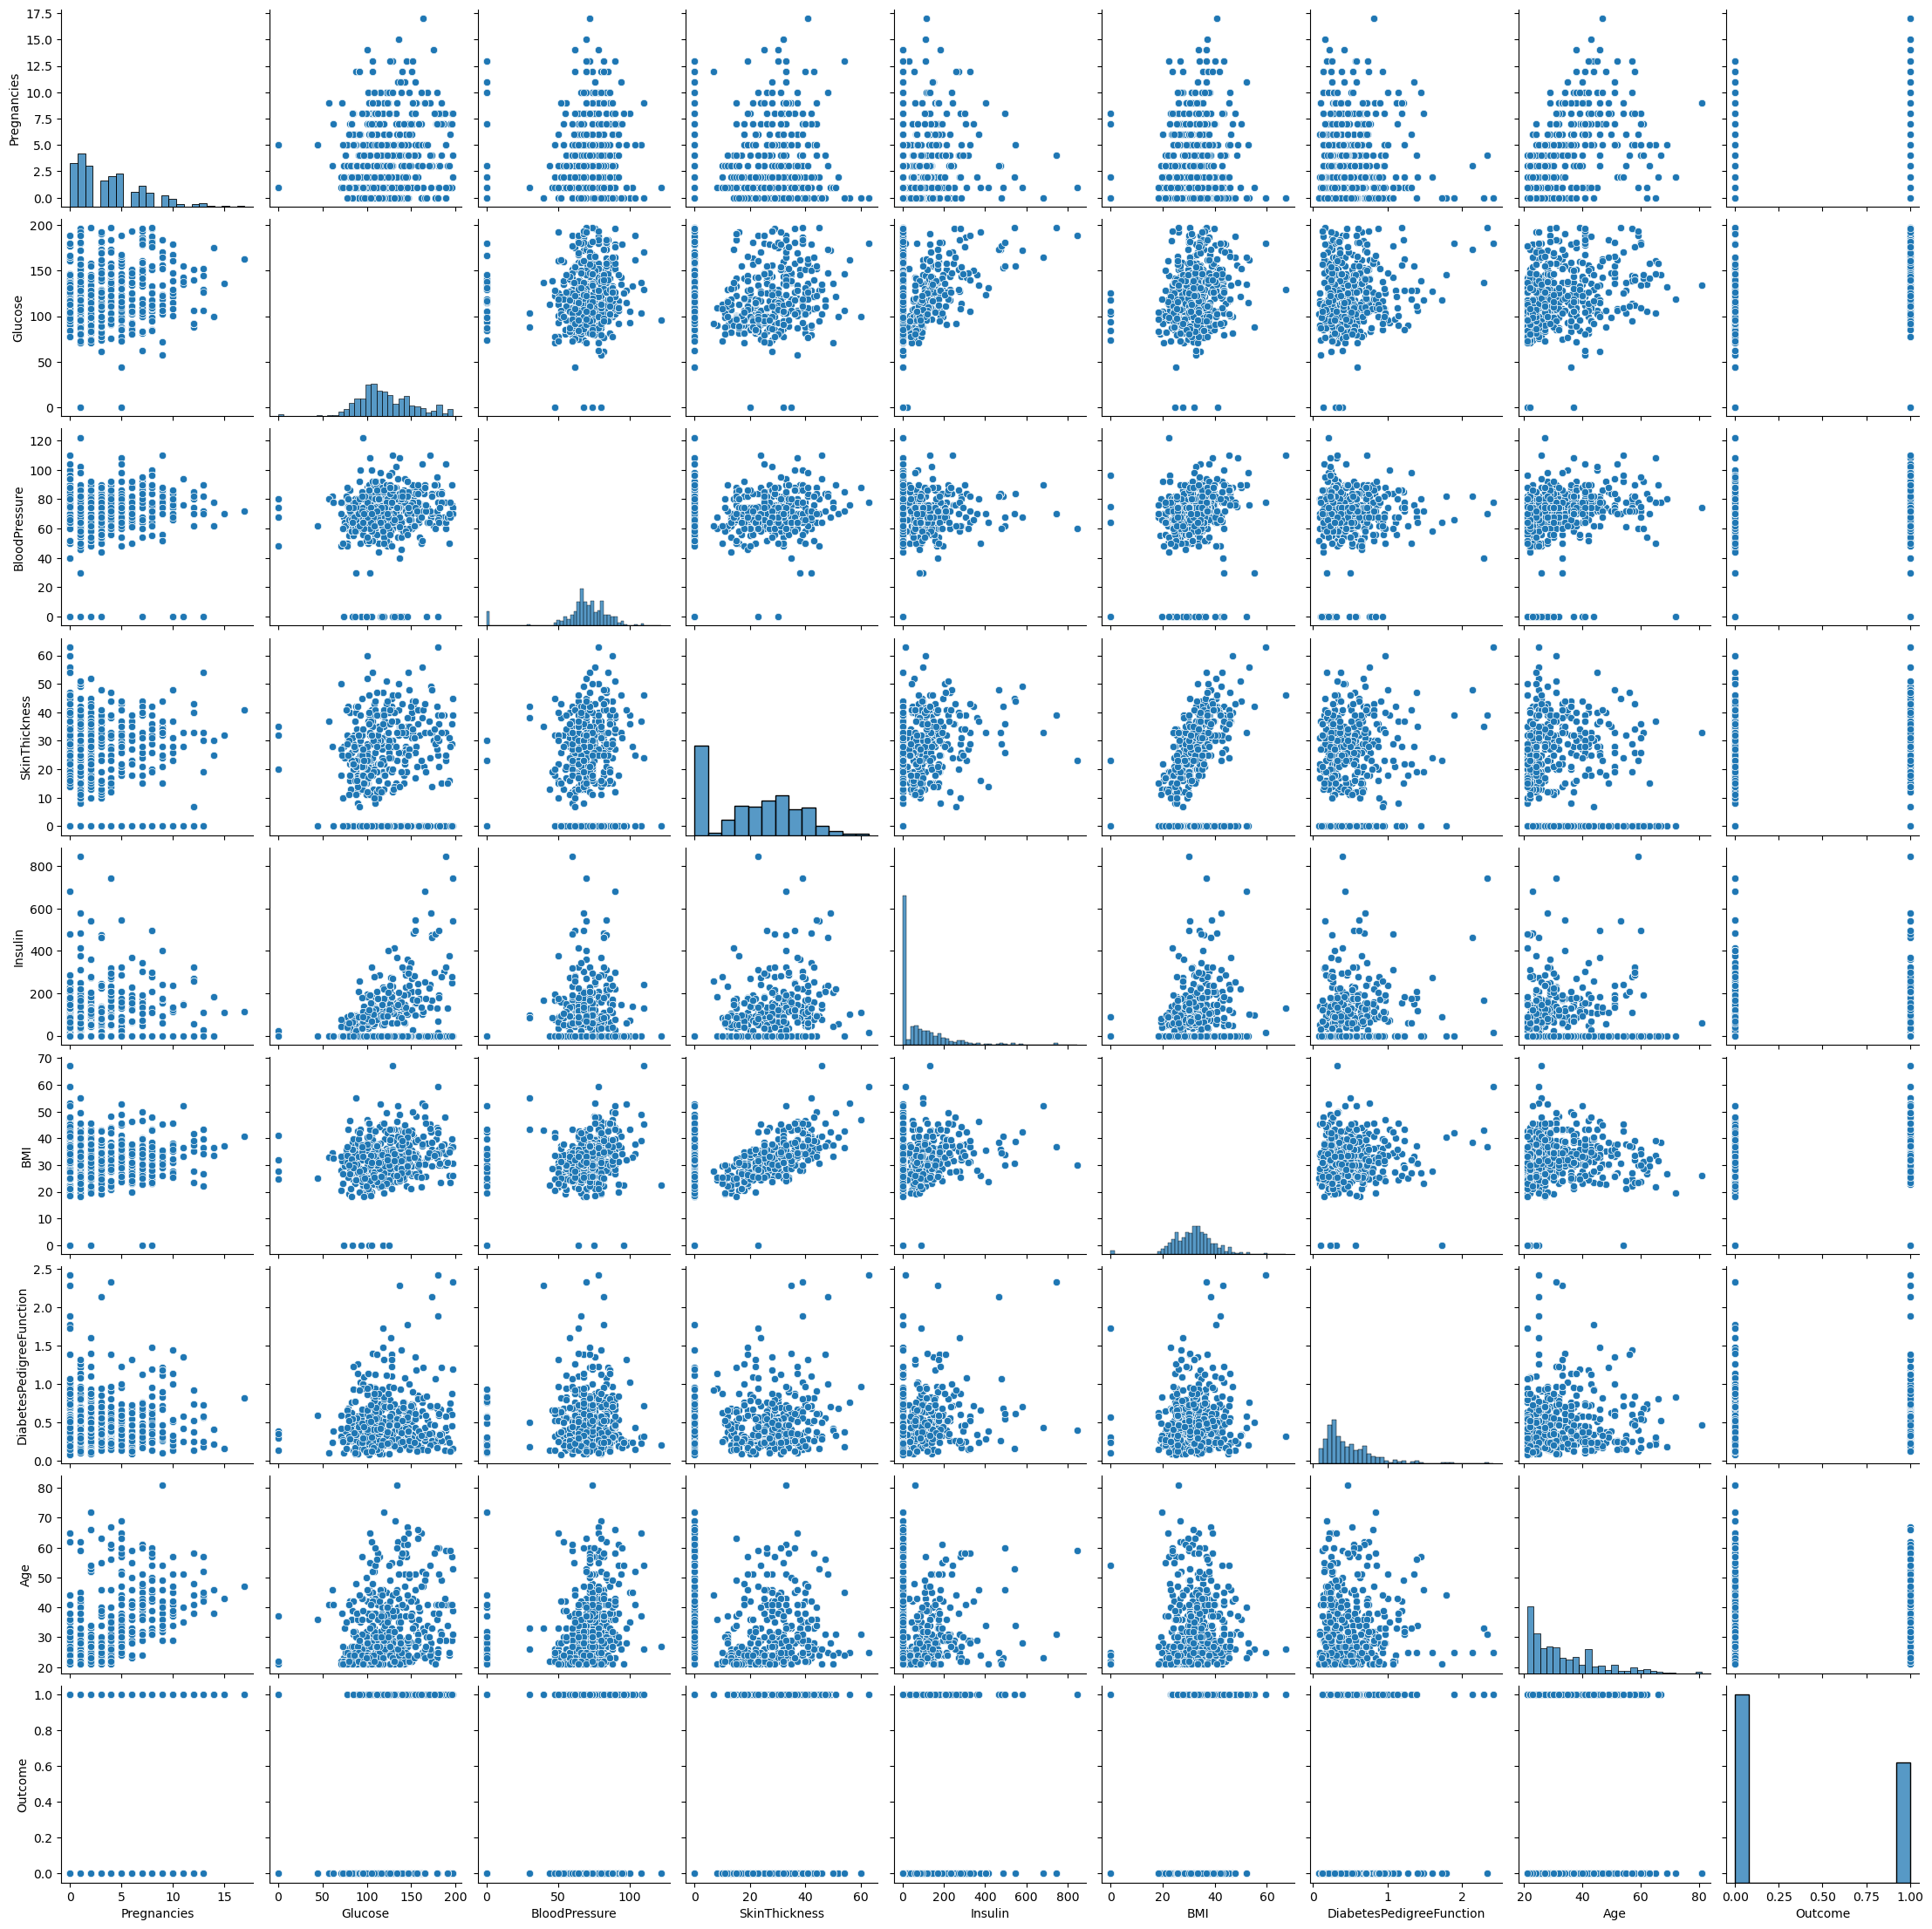

In [8]:
sns.pairplot(train_data)

**The same as on the heatmap we can see sligh correlation between those features mantioned above.**

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

features = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig = make_subplots(rows=len(features), cols=1)

for i, feature in enumerate(features, start=1):
    fig.add_trace(
        go.Box(y=train_data[feature], name=feature),
        row=i, col=1
    )
fig.update_layout(height=1500, width=500, title_text="Box Plots of Features", showlegend=False)
fig.update_traces(boxpoints='outliers')
fig.show()

**Some data points were really outstanding as we can see from the boxplot above. Let's create df without outlieyrs. For the future we will train all our models on both data sets - with and without outliers as some models might work better with outstanding data points while some not.**

# Creating DF without outliyers

In [10]:
train_df = train_data[(train_data['Insulin']<285)&(train_data['Glucose']>44)&(train_data['BloodPressure']>40)&(train_data['BloodPressure']<110)&(train_data['BMI']>18)&(train_data['BMI']<50)&(train_data['Age']<80)&(train_data['DiabetesPedigreeFunction']<1.224)]

In [11]:
train_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
5               5      116             74              0        0  25.6   
...           ...      ...            ...            ...      ...   ...   
2455            3      126             88             41      235  39.3   
2456            4      123             62              0        0  32.0   
2457            1       80             74             11       60  30.0   
2458            1       96             64             27       87  33.2   
2459            6      105             70             32       68  30.8   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
5                        0.201   30        0  
...                        ...  ...      ...  
2455                     0.704   27        0  
2456                     0.226   35        1  
2457                     0.527   22        0  
2458                     0.289   21        0  
2459                     0.122   37        0  

[2029 rows x 9 columns]

In [12]:
features = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig = make_subplots(rows=len(features), cols=1)

for i, feature in enumerate(features, start=1):
    fig.add_trace(
        go.Box(y=train_df[feature], name=feature),
        row=i, col=1
    )
fig.update_layout(height=1500, width=500, title_text="Box Plots of Features", showlegend=False)
fig.update_traces(boxpoints='outliers')
fig.show()

/Users/irenzo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



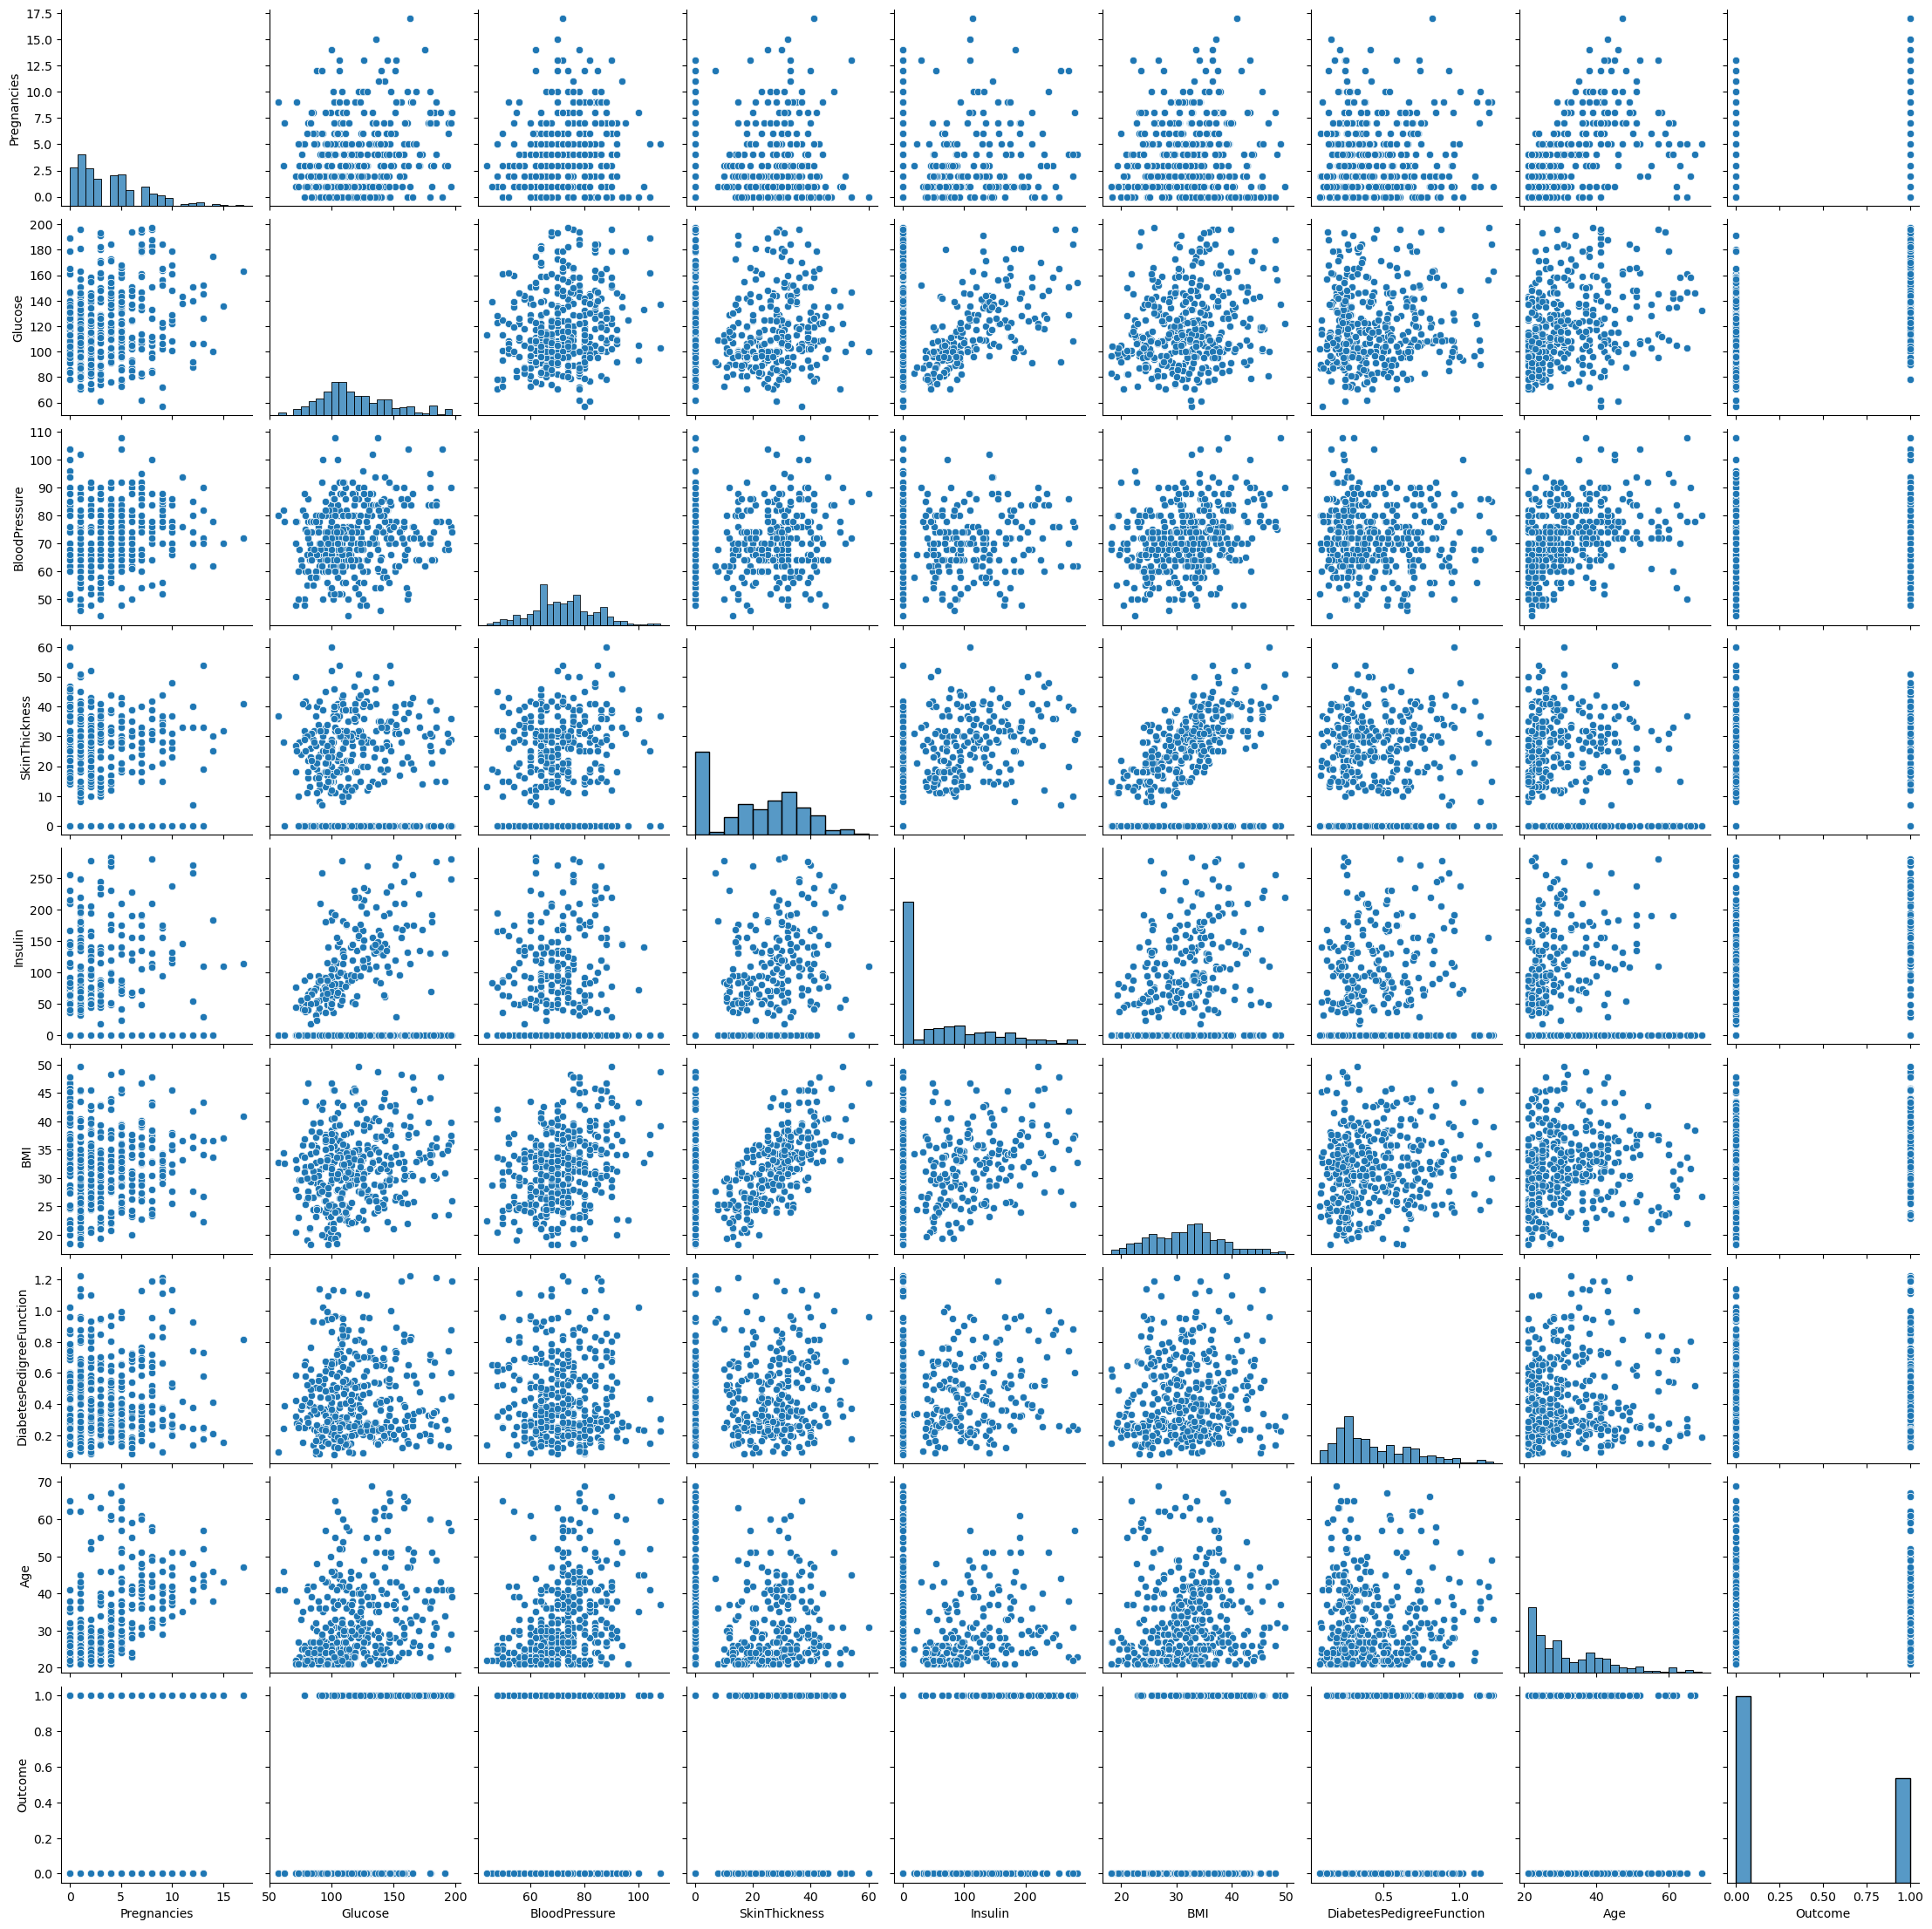

In [13]:
sns.pairplot(train_df)

## Data Normalization and X-Y Split

**We need to determine x part (with features) and y part (with our value to predict - 'Outcome' in this case). Also we need to normalize data as we have a huge range in the given data set.**

In [14]:
train_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [15]:
test_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      120             72             22       56  20.8   
1            1       71             62              0        0  21.8   
2            8       74             70             40       49  35.3   
3            5       88             78             30        0  27.6   
4           10      115             98              0        0  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.733   48        0  
1                     0.416   26        0  
2                     0.705   39        0  
3                     0.258   37        0  
4                     1.022   34        0

In [28]:
# Normalize Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI and Age

columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
for col in columns:
    train_df.loc[:, col] = train_df[col] / train_df[col].max()
    train_data.loc[:, col] = train_data[col] / train_data[col].max()
    test_data.loc[:, col] = test_data[col] / test_data[col].max()

In [30]:
# Define x and y for train and test
x_train = train_df.drop(['Outcome'],axis=1)
y_train = train_df['Outcome']

x_train_with_outliyers = train_data.drop(['Outcome'],axis=1)
y_train_with_outliyers = train_data['Outcome']

x_test = test_data.drop(['Outcome'],axis=1)
y_test = test_data['Outcome']

In [31]:
print(f'x_train shape: ',{x_train.shape})
print(f'y_train shape: ',{y_train.shape})
print()
print(f'x_train_with_outliyers shape: ',{x_train_with_outliyers.shape})
print(f'y_train_with_outliyers shape: ',{y_train_with_outliyers.shape})
print()
print(f'x_test shape: ',{x_test.shape})
print(f'y_test shape: ',{y_test.shape})

x_train shape:  {(2029, 8)}
y_train shape:  {(2029,)}

x_train_with_outliyers shape:  {(2460, 8)}
y_train_with_outliyers shape:  {(2460,)}

x_test shape:  {(308, 8)}
y_test shape:  {(308,)}


In [32]:
x_train_np = x_train.values 
y_train_np = y_train.values 

x_train_with_outliyers_np = x_train_with_outliyers.values
y_train_with_outliyers_np = y_train_with_outliyers.values

x_test_np = x_test.values
y_test_np = y_test.values

## Logistic Regression Model Using Math

**Just for educational purposes we will define the logistic regression model using math only. This is pretty easy and straightforward.**

In [20]:
# Cost function which we will want to minimize

def cost_function(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range (m):
        z = np.dot(w,x[i])+b
        f = 1/(1+math.e**(-z)) #sigmoid function
        cost += -y[i]*np.log(f)-(1-y[i])*np.log(1-f)
    cost=cost/m
    return cost

# To find the minimum of the cost function we need to know in what direction we should move. For that -
# we will find derivatives of w and b (gradient)

def gradient_function (x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range (m):
        z = np.dot(w,x[i])+b
        f = 1/(1+math.e**(-z))
        err = f-y[i]
        for j in range(n):
            dj_dw[j]+= err*x[i,j]
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

# Now we use gradient descent which will allow us to find the minimum value of cost function.
# From the previous function we know in what direction to move, now we need to know the step size (learning rate alpha)

# Gradient Descent

def gradient_descent (x, y, w_in, b_in, alpha, num_iters, compute_gradient, compute_cost):
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range (num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i<10000:
            J_history.append(compute_cost(x,y,w,b))
        if i % math.ceil(num_iters / 10) == 0 or i == num_iters-1:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
        
    return w,b,J_history

## Final w and b for data without outliers

In [141]:
# We can change the alpha (learning rate) and number of iterations

initial_w = np.zeros(x_train_np.shape[1])
initial_b = 0.0
iterations = 10000
alpha =  0.075

w_final, b_final, J_hist = gradient_descent(x_train_np, y_train_np, initial_w, initial_b, alpha, iterations, gradient_function, cost_function)
print(f"Final w: {w_final}, final b: {b_final:0.2f}")

Iteration    0: Cost 0.6901107157766443
Iteration 1000: Cost 0.5879680625171426
Iteration 2000: Cost 0.5548646168972942
Iteration 3000: Cost 0.5363115581151828
Iteration 4000: Cost 0.5243354254475149
Iteration 5000: Cost 0.5160305453011613
Iteration 6000: Cost 0.5100364763858708
Iteration 7000: Cost 0.5055983301846823
Iteration 8000: Cost 0.5022512845485788
Iteration 9000: Cost 0.4996906087528892
Iteration 9999: Cost 0.4977101140076511
Final w: [ 1.80866531  5.20895227 -0.45796464 -0.31846258  0.16269443  2.74328455
  1.46404642  0.42941975], final b: -6.47


## Final w and b for data with outliers

In [142]:
# We can change the alpha (learning rate) and number of iterations

initial_w = np.zeros(x_train_np.shape[1])
initial_b = 0.0
iterations = 10000
alpha =  0.45

w_final_with_outliyers, b_final_with_outliyers, J_hist = gradient_descent(x_train_with_outliyers_np, y_train_with_outliyers_np, initial_w, initial_b, alpha, iterations, gradient_function, cost_function)
print(f"Final w: {w_final}, final b: {b_final:0.2f}")

Iteration    0: Cost 0.6853722465344476
Iteration 1000: Cost 0.5320790384481138
Iteration 2000: Cost 0.5189966760940457
Iteration 3000: Cost 0.515617317534632
Iteration 4000: Cost 0.5145573489161224
Iteration 5000: Cost 0.5141962995066689
Iteration 6000: Cost 0.5140677410699807
Iteration 7000: Cost 0.5140207695191787
Iteration 8000: Cost 0.5140033386777202
Iteration 9000: Cost 0.5139968080295068
Iteration 9999: Cost 0.5139943480403176
Final w: [ 1.80866531  5.20895227 -0.45796464 -0.31846258  0.16269443  2.74328455
  1.46404642  0.42941975], final b: -6.47


## Model makes predictions

In [143]:
m, _ = x_test_np.shape
predictions = []
target_values = []

# For data without outlyers
for i in range(m):
    prediction = 1/(1+math.e**(-(np.dot(x_test_np[i], w_final) + b_final)))
    target_value = y_test_np[i]
    predictions.append(prediction)
    target_values.append(target_value)

predictions = np.array(predictions)
target_values = np.array(target_values)

# For data with outlyers
predictions_with_outlyers = []

for i in range(m):
    prediction_with_outlyers = 1/(1+math.e**(-(np.dot(x_test_np[i], w_final_with_outliyers) + b_final_with_outliyers)))
    target_value = y_test_np[i]
    predictions_with_outlyers.append(prediction_with_outlyers)
    
predictions_with_outlyers = np.array(predictions_with_outlyers)

In [144]:
# Set threshold point to 0.5 - just the random number.
threshold = 0.5
predictions_01 = []

for _ in predictions:
    if _ >= threshold:
        predictions_01.append(1)
    else:
        predictions_01.append(0)
        
predictions_with_outlyers_01 = []
for _ in predictions_with_outlyers:
    if _ >= threshold:
        predictions_with_outlyers_01.append(1)
    else:
        predictions_with_outlyers_01.append(0)


### Logistic Regression Results (Train Data without Outliers)

In [146]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision_score_log = (precision_score(y_test_np, predictions_01))
recall_score_log = (recall_score(y_test_np, predictions_01))
accuracy_score_log = (accuracy_score(y_test_np, predictions_01))
f1_score_log = (f1_score(y_test_np, predictions_01))
print(classification_report(y_test_np, predictions_01))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       215
           1       0.74      0.62      0.68        93

    accuracy                           0.82       308
   macro avg       0.80      0.77      0.78       308
weighted avg       0.82      0.82      0.82       308



### Logistic Regression Results (Train Data with Outliers)

In [147]:
precision_score_log_o = (precision_score(y_test_np, predictions_with_outlyers_01))
recall_score_log_o = (recall_score(y_test_np, predictions_with_outlyers_01))
accuracy_score_log_o = (accuracy_score(y_test_np, predictions_with_outlyers_01))
f1_score_log_o = (f1_score(y_test_np, predictions_with_outlyers_01))
print(classification_report(y_test_np, predictions_with_outlyers_01))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       215
           1       0.61      0.78      0.69        93

    accuracy                           0.78       308
   macro avg       0.75      0.78      0.76       308
weighted avg       0.81      0.78      0.79       308



# Logistic Regression with Sklearn

## Data without Outliers

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_np, y_train_np)

log_sk_pred_np = model.predict(x_test_np)

from sklearn.metrics import confusion_matrix, classification_report

pd.DataFrame(confusion_matrix(y_test_np, log_sk_pred_np),
            index=['True_0', 'True_1'],
            columns=['Pred_0', 'Pred_1'])
            

Pred_0  Pred_1
True_0     196      19
True_1      39      54

In [105]:
precision_score_log_sk = (precision_score(y_test_np, log_sk_pred_np))
recall_score_log_sk = (recall_score(y_test_np, log_sk_pred_np))
accuracy_score_log_sk = (accuracy_score(y_test_np, log_sk_pred_np))
f1_score_log_sk = (f1_score(y_test_np, log_sk_pred_np))
print(classification_report(y_test_np, log_sk_pred_np))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       215
           1       0.74      0.58      0.65        93

    accuracy                           0.81       308
   macro avg       0.79      0.75      0.76       308
weighted avg       0.81      0.81      0.80       308



## Data with Outliers

In [106]:
model_wo = LogisticRegression()
model_wo.fit(x_train_with_outliyers_np, y_train_with_outliyers_np)

log_sk_o_pred_np = model_wo.predict(x_test_np)

pd.DataFrame(confusion_matrix(y_test_np, log_sk_o_pred_np),
            index=['True_0', 'True_1'],
            columns=['Pred_0', 'Pred_1'])
            

Pred_0  Pred_1
True_0     172      43
True_1      23      70

In [107]:
precision_score_log_sk_o = (precision_score(y_test_np, log_sk_o_pred_np))
recall_score_log_sk_o = (recall_score(y_test_np, log_sk_o_pred_np))
accuracy_score_log_sk_o = (accuracy_score(y_test_np, log_sk_o_pred_np))
f1_score_log_sk_o = (f1_score(y_test_np, log_sk_o_pred_np))
print(classification_report(y_test_np, log_sk_o_pred_np))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       215
           1       0.62      0.75      0.68        93

    accuracy                           0.79       308
   macro avg       0.75      0.78      0.76       308
weighted avg       0.80      0.79      0.79       308



# Decision Tree - Data without Outliers

In [108]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(x_train_np, y_train_np)
tree_pred = tree.predict(x_test_np)
pd.DataFrame(confusion_matrix(y_test_np, tree_pred),
            index=['True_0', 'True_1'],
            columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0     172      43
True_1      43      50

In [109]:
precision_score_tree = (precision_score(y_test_np, tree_pred))
recall_score_tree = (recall_score(y_test_np, tree_pred))
accuracy_score_tree = (accuracy_score(y_test_np, tree_pred))
f1_score_tree = (f1_score(y_test_np, tree_pred))
print(classification_report(y_test_np, tree_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       215
           1       0.54      0.54      0.54        93

    accuracy                           0.72       308
   macro avg       0.67      0.67      0.67       308
weighted avg       0.72      0.72      0.72       308



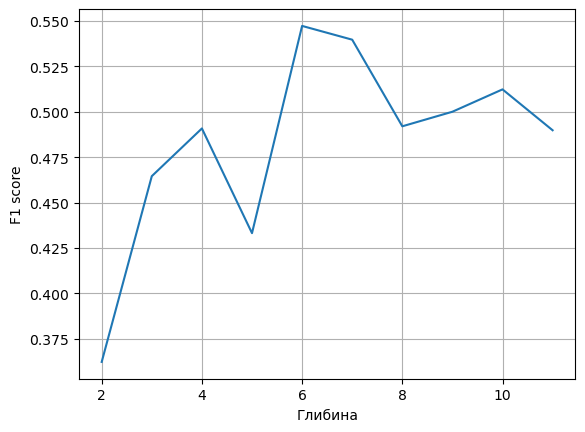

In [69]:
f1_scores = []

for depth in range(2, 12):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(x_train_np, y_train_np)
    y_pred = tree.predict(x_test_np)
    f1_scores.append(f1_score(y_test_np, tree_pred))
    
plt.plot(range(2, 12), f1_scores)
plt.grid()
plt.xlabel('Глибина')
plt.ylabel('F1 score')
plt.show()

# Decision Tree - Data with Outliers

In [110]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train_with_outliyers_np, y_train_with_outliyers_np)
tree_o_pred = tree.predict(x_test_np)
pd.DataFrame(confusion_matrix(y_test_np, tree_o_pred),
            index=['True_0', 'True_1'],
            columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0     147      68
True_1      21      72

In [111]:
precision_score_tree_o = (precision_score(y_test_np, tree_o_pred))
recall_score_tree_o = (recall_score(y_test_np, tree_o_pred))
accuracy_score_tree_o = (accuracy_score(y_test_np, tree_o_pred))
f1_score_tree_o = (f1_score(y_test_np, tree_o_pred))
print(classification_report(y_test_np, tree_o_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77       215
           1       0.51      0.77      0.62        93

    accuracy                           0.71       308
   macro avg       0.69      0.73      0.69       308
weighted avg       0.77      0.71      0.72       308



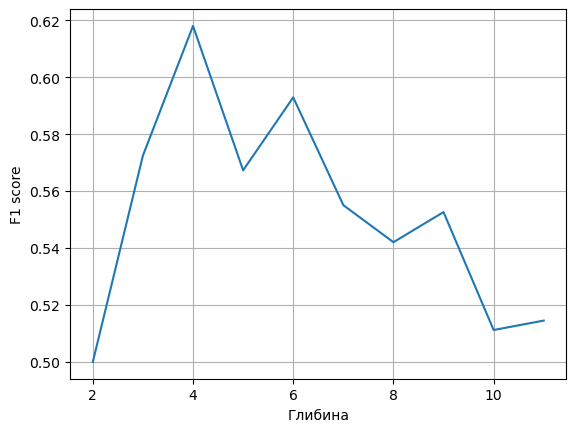

In [72]:
f1_scores = []

for depth in range(2, 12):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(x_train_with_outliyers_np, y_train_with_outliyers_np)
    tree_o_pred = tree.predict(x_test_np)
    f1_scores.append(f1_score(y_test_np, tree_o_pred))
    
plt.plot(range(2, 12), f1_scores)
plt.grid()
plt.xlabel('Глибина')
plt.ylabel('F1 score')
plt.show()

# Random Forest - Data without Outliers

In [84]:
from sklearn.ensemble import RandomForestClassifier
f1_scores = []

for n_est in [10, 20, 30, 50, 100, 200, 300, 400, 450, 500]:
    forest = RandomForestClassifier(max_depth=6)
    %time forest.fit(x_train_np, y_train_np)

    forest_pred = forest.predict(x_test_np)
    f1_scores.append(f1_score(y_test_np, forest_pred))

CPU times: user 90.1 ms, sys: 4.17 ms, total: 94.3 ms
Wall time: 93.8 ms
CPU times: user 85.9 ms, sys: 769 µs, total: 86.7 ms
Wall time: 88.3 ms
CPU times: user 83 ms, sys: 426 µs, total: 83.4 ms
Wall time: 83.8 ms
CPU times: user 87 ms, sys: 697 µs, total: 87.7 ms
Wall time: 88.3 ms
CPU times: user 86.8 ms, sys: 453 µs, total: 87.3 ms
Wall time: 88.3 ms
CPU times: user 82.6 ms, sys: 268 µs, total: 82.9 ms
Wall time: 83.2 ms
CPU times: user 85.2 ms, sys: 381 µs, total: 85.6 ms
Wall time: 85.7 ms
CPU times: user 83.4 ms, sys: 254 µs, total: 83.7 ms
Wall time: 84.1 ms
CPU times: user 83.9 ms, sys: 360 µs, total: 84.2 ms
Wall time: 84.8 ms
CPU times: user 87.1 ms, sys: 438 µs, total: 87.6 ms
Wall time: 88.2 ms


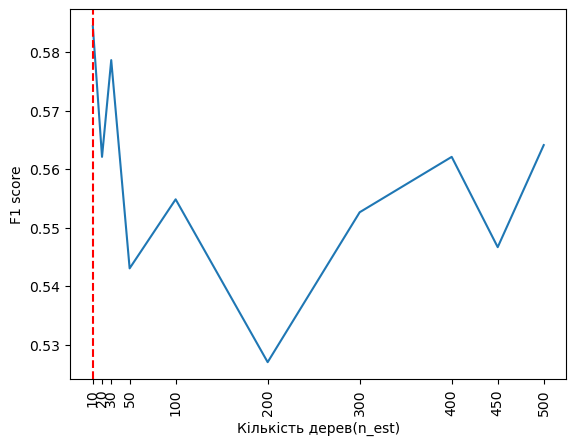

In [85]:
# Let's visualize the best no.of trees
n_est = [10, 20, 30, 50, 100, 200, 300, 400, 450, 500]

plt.plot(n_est, f1_scores)
plt.xlabel('Кількість дерев(n_est)')
plt.ylabel('F1 score')

plt.xticks([10, 20, 30, 50, 100, 200, 300, 400, 450, 500])
max_index = f1_scores.index(max(f1_scores))
max_depth = n_est[max_index]
plt.axvline(x=max_depth, color='r', linestyle='--')
plt.xticks(rotation = 90)
plt.show()

In [86]:
# Now when we know perfect depth and number of trees - let's teach the model
forest = RandomForestClassifier(max_depth=6, n_estimators=10)
forest.fit(x_train_np, y_train_np)

forest_pred = forest.predict(x_test_np)
print(classification_report(y_test_np, forest_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       215
           1       0.79      0.52      0.62        93

    accuracy                           0.81       308
   macro avg       0.80      0.73      0.75       308
weighted avg       0.81      0.81      0.80       308



In [92]:
precision_score_forest = (precision_score(y_test_np, forest_pred))
recall_score_forest = (recall_score(y_test_np, forest_pred))
accuracy_score_forest = (accuracy_score(y_test_np, forest_pred))
f1_score_forest = (f1_score(y_test_np, forest_pred))
pd.DataFrame(confusion_matrix(y_test_np, forest_pred),
            index=['True_0', 'True_1'],
            columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0     166      49
True_1      19      74

# Random Forest - Data without Outliers

In [83]:
f1_scores = []

for n_est in [10, 20, 30, 50, 100, 200, 300, 400, 450, 500]:
    forest = RandomForestClassifier(max_depth=4)
    %time forest.fit(x_train_with_outliyers_np, y_train_with_outliyers_np)

    forest_o_pred = forest.predict(x_test_np)
    f1_scores.append(f1_score(y_test_np, forest_o_pred))

CPU times: user 91.6 ms, sys: 4.19 ms, total: 95.8 ms
Wall time: 95.6 ms
CPU times: user 85.1 ms, sys: 422 µs, total: 85.5 ms
Wall time: 85.9 ms
CPU times: user 82.3 ms, sys: 420 µs, total: 82.7 ms
Wall time: 83.6 ms
CPU times: user 86.1 ms, sys: 423 µs, total: 86.5 ms
Wall time: 86.6 ms
CPU times: user 82.4 ms, sys: 267 µs, total: 82.7 ms
Wall time: 82.8 ms
CPU times: user 82.2 ms, sys: 247 µs, total: 82.4 ms
Wall time: 82.4 ms
CPU times: user 85 ms, sys: 367 µs, total: 85.3 ms
Wall time: 85.4 ms
CPU times: user 83.2 ms, sys: 239 µs, total: 83.5 ms
Wall time: 83.7 ms
CPU times: user 82.9 ms, sys: 281 µs, total: 83.2 ms
Wall time: 83.5 ms
CPU times: user 93.6 ms, sys: 1.06 ms, total: 94.7 ms
Wall time: 96.7 ms


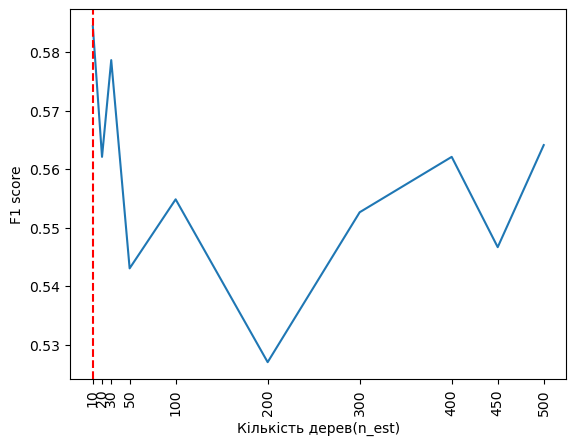

In [88]:
# Let's visualize the best no.of trees
n_est = [10, 20, 30, 50, 100, 200, 300, 400, 450, 500]

plt.plot(n_est, f1_scores)
plt.xlabel('Кількість дерев(n_est)')
plt.ylabel('F1 score')

plt.xticks([10, 20, 30, 50, 100, 200, 300, 400, 450, 500])
max_index = f1_scores.index(max(f1_scores))
max_depth = n_est[max_index]
plt.axvline(x=max_depth, color='r', linestyle='--')
plt.xticks(rotation = 90)
plt.show()

In [89]:
# Now when we know perfect depth and number of trees - let's teach the model
forest = RandomForestClassifier(max_depth=4, n_estimators=10)
forest.fit(x_train_with_outliyers_np, y_train_with_outliyers_np)

forest_o_pred = forest.predict(x_test_np)
print(classification_report(y_test_np, forest_o_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       215
           1       0.60      0.80      0.69        93

    accuracy                           0.78       308
   macro avg       0.75      0.78      0.76       308
weighted avg       0.81      0.78      0.79       308



In [91]:
precision_score_forest_o = (precision_score(y_test_np, forest_o_pred))
recall_score_forest_o = (recall_score(y_test_np, forest_o_pred))
accuracy_score_forest_o = (accuracy_score(y_test_np, forest_o_pred))
f1_score_forest_0 = (f1_score(y_test_np, forest_o_pred))
pd.DataFrame(confusion_matrix(y_test_np, forest_o_pred),
            index=['True_0', 'True_1'],
            columns=['Pred_0', 'Pred_1'])

Pred_0  Pred_1
True_0     166      49
True_1      19      74

# Compare all metrics

In [148]:
indexes = ['Precision','Recall','F1','Accuracy']

data = {
    'LogReg without outliers': [precision_score_log, recall_score_log, f1_score_log, accuracy_score_log],  
    'LogReg with outliers': [precision_score_log_o, recall_score_log_o, f1_score_log_o, accuracy_score_log_o],

    'LogReg SK without outliers': [precision_score_log_sk, recall_score_log_sk, f1_score_log_sk, accuracy_score_log_sk],  
    'LogReg SK with outliers': [precision_score_log_sk_o, recall_score_log_sk_o, f1_score_log_sk_o, accuracy_score_log_sk_o],

    'Tree without outliers': [precision_score_tree, recall_score_tree, f1_score_tree, accuracy_score_tree],  
    'Tree with outliers': [precision_score_tree_o, recall_score_tree_o, f1_score_tree_o, accuracy_score_tree_o],

    'Forest without outliers': [precision_score_forest, recall_score_forest, f1_score_forest, accuracy_score_forest],  
    'Forest with outliers': [precision_score_forest_o, recall_score_forest_o, f1_score_forest_0, accuracy_score_forest_o],

}

compare_metrics = pd.DataFrame(data, index=indexes)

compare_metrics.head()

LogReg without outliers  LogReg with outliers  \
Precision                 0.743590              0.608333   
Recall                    0.623656              0.784946   
F1                        0.678363              0.685446   
Accuracy                  0.821429              0.782468   

           LogReg SK without outliers  LogReg SK with outliers  \
Precision                    0.739726                 0.608333   
Recall                       0.580645                 0.784946   
F1                           0.650602                 0.685446   
Accuracy                     0.811688                 0.782468   

           Tree without outliers  Tree with outliers  Forest without outliers  \
Precision               0.537634            0.514286                 0.601626   
Recall                  0.537634            0.774194                 0.795699   
F1                      0.537634            0.618026                 0.685185   
Accuracy                0.720779            0.711039                 0.779221   

           Forest with outliers  
Precision              0.601626  
Recall                 0.795699  
F1                     0.685185  
Accuracy               0.779221

In [149]:
max_recall_column = compare_metrics.loc['Recall'].idxmax()
print(f"The column with the maximum recall is: {max_recall_column}")

min_recall_column = compare_metrics.loc['Recall'].idxmin()
print(f"The column with the minimum recall is: {min_recall_column}")

The column with the maximum recall is: Forest without outliers
The column with the minimum recall is: Tree without outliers


# Conclusion

To determine the best model for predicting the presence of diabetes based on the provided metrics, we need to consider the balance and trade-offs between Precision, Recall, F1 Score, and Accuracy. Generally, the choice of the best model can depend on the specific requirements of the healthcare scenario:

- **Precision** is important if the cost of a false positive is high (e.g., unnecessary worry or treatment).
- **Recall** is crucial if the cost of a false negative is high (missing a diagnosis of diabetes).
- **F1 Score** provides a balance between Precision and Recall, useful when it's important to maintain a balance between these two metrics.
- **Accuracy** measures the overall correctness of the model, but it can be misleading if the dataset is imbalanced.

Based on our data:

1. **Recall**:
   - The 'Forest without outliers' and 'Forest with outliers' models have the highest recall (0.795699), which means they are the best at identifying all actual cases of diabetes. This is particularly important in medical diagnostics, where missing a positive case (false negative) can have serious implications.

2. **Precision**:
   - The 'LogReg without outliers' model has the highest precision (0.743590), indicating it has the lowest rate of false positives among the models. This is important if the goal is to minimize unnecessary treatment or anxiety. Please note, that the custom model has better precision score than the one from the box.

3. **F1 Score**:
   - The 'LogReg with outliers', 'LogReg SK with outliers', 'Forest without outliers', and 'Forest with outliers' models all share the highest F1 score, suggesting a balance between precision and recall.

4. **Accuracy**:
   - The 'LogReg SK without outliers' and 'LogReg without outliers' models have the highest accuracy, making it the best model for overall correctness in prediction.

Considering the importance of not missing positive cases in diabetes prediction (high recall), alongside the need for a balanced precision-recall trade-off (high F1 score), and overall accuracy, the **'Forest without outliers'** and **'Forest with outliers'** models emerge as strong candidates. They have the highest recall and a high F1 score, indicating they are less likely to miss cases of diabetes while maintaining a balance between precision and recall.

If the priority is to ensure no case of diabetes goes undiagnosed (maximizing recall), either the **'Forest without outliers'** or **'Forest with outliers'** model would be recommended. The choice between them might then depend on other considerations, such as the impact of outliers on model interpretability or performance in specific patient groups. If the dataset is significantly imbalanced, accuracy might not be the best standalone metric to rely on, making the high recall and F1 score of the forest models particularly appealing.

### We can try to make some custom predictions.
**WARNING** <br>
**THIS DATA IS FOR THE EDUCATIONAL PURPOSES ONLY - I AM NOT AWARE OF THE QUALITY OF THE COLLECTED DATA. DO NOT USE THIS MODEL IN DIAGNOSIS AND ALWAYS CONSULT WITH YOUR DOCTOR.**

In [126]:
# Input - user can input his/her data and we will normalize it first
pregnancies = int(input('Pregnancies number:'))
glucose = (int(input('Glucose in blood:')))/197
bp = (int(input('Diastolic Blood Pressure:')))/108
st = (int(input('Skin Thickness:')))/60
insulin = (int(input('Insulin level:')))/284
bmi = (float(input('Body Mass Index:')))/49.7
dpf = (float(input('DiabetesPedigreeFunction:')))/1.222
age = (int(input('Age:')))/69

Pregnancies number:0
Glucose in blood:100
Diastolic Blood Pressure:80
Skin Thickness:30
Insulin level:200
Body Mass Index:19
DiabetesPedigreeFunction:0.8
Age:24


In [133]:
# Prediction made by Random Forest model trained on the data without outliers

x_input_list = [pregnancies, glucose, bp, st, insulin, bmi, dpf, age]
x_input_np = np.array([x_input_list])

forest_o_pred = forest.predict(x_input_np)
if forest_o_pred == 0:
    print ('No diabetes')
    print()
    print('WARNING')
    print('MODEL WAS TRAINED IN EDUCATIONAL PURPOSES ONLY. DO NOT USE FOR REAL DIAGNOSIS. ALWAYS CONSULT WITH YOUR DOCTOR.')
else:
    print('Diabetes')
    print()
    print('WARNING')
    print('MODEL WAS TRAINED IN EDUCATIONAL PURPOSES ONLY. DO NOT USE FOR REAL DIAGNOSIS. ALWAYS CONSULT WITH YOUR DOCTOR.')

No diabetes

WARNING
MODEL WAS TRAINED IN EDUCATIONAL PURPOSES ONLY. DO NOT USE FOR REAL DIAGNOSIS. ALWAYS CONSULT WITH YOUR DOCTOR.
